In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf 

In [30]:
df=pd.read_csv('data.csv')

In [31]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [32]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [33]:
df.shape

(107, 2)

In [34]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [35]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [36]:
df.drop(106,axis=0,inplace=True)

In [37]:
df.drop(105, axis=0, inplace=True)

In [38]:
df.shape

(105, 2)

In [39]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [40]:
df["Month"]=pd.to_datetime(df['Month'])

In [41]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [43]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [44]:
df.set_index('Month',inplace= True)

In [45]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [46]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

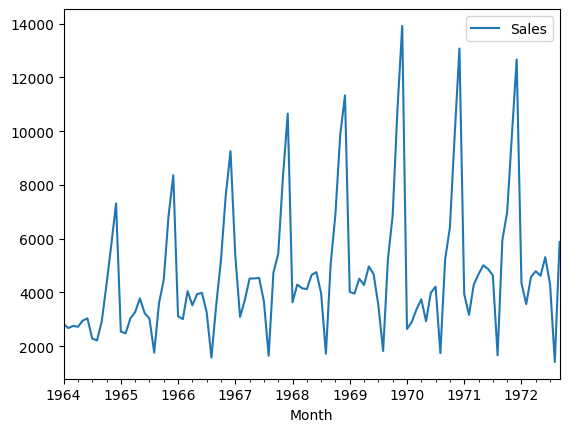

In [47]:
df.plot()

In [48]:
adfuller(df["Sales"])

(np.float64(-1.8335930563276175),
 np.float64(0.3639157716602477),
 11,
 93,
 {'1%': np.float64(-3.502704609582561),
  '5%': np.float64(-2.8931578098779522),
  '10%': np.float64(-2.583636712914788)},
 np.float64(1478.4633060594724))

In [49]:
def adfuller_test(sales):
    result =adfuller(sales)

    labels = ["ADF test statistics", "p-value", "Lags used", "Number of obs used"]

    for value,label in zip(result, labels):
        print("{}:{}".format(label,value))

    if result[1]<=0.05:
        print('Strong evidence against null hypothesis, reject the null hypothesis and data is stationary')
    else:
        print('Weak evidence against null hypothesis, accept the null hypothesis and data is not stationary')

In [50]:
adfuller_test(df["Sales"])

ADF test statistics:-1.8335930563276175
p-value:0.3639157716602477
Lags used:11
Number of obs used:93
Weak evidence against null hypothesis, accept the null hypothesis and data is not stationary


In [51]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [52]:
df["Sales"].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [53]:
df['Sales first diff.'] = df['Sales'] - df['Sales'].shift(1)

In [54]:
df.head()

,Sales,Sales first diff.
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [55]:
df['Seasonal first diff.'] = df['Sales'] - df['Sales'].shift(12)

In [57]:
df.head(15)

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [58]:
adfuller_test(df['Seasonal first diff.'].dropna())

ADF test statistics:-7.626619157213164
p-value:2.060579696813685e-11
Lags used:0
Number of obs used:92
Strong evidence against null hypothesis, reject the null hypothesis and data is stationary


<Axes: xlabel='Month'>

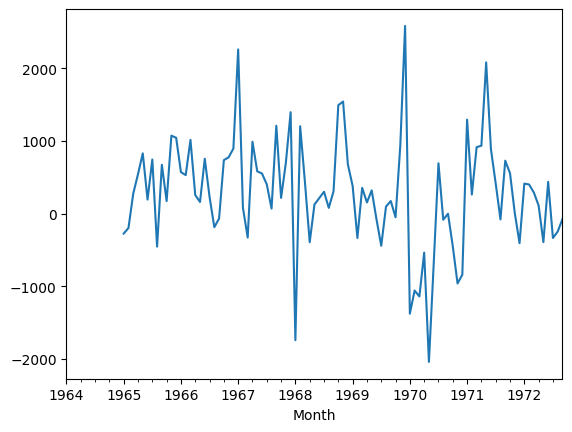

In [60]:
df['Seasonal first diff.'].plot()

In [61]:
df.head(15)

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


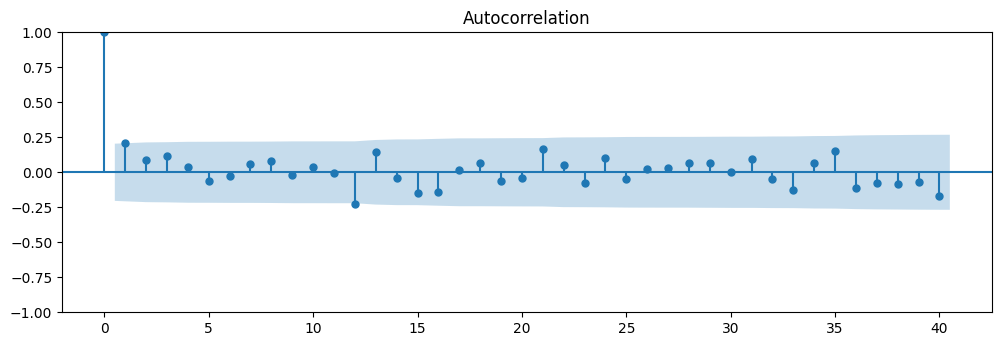

In [62]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal first diff.'].iloc[13:], lags=40, ax=ax1)

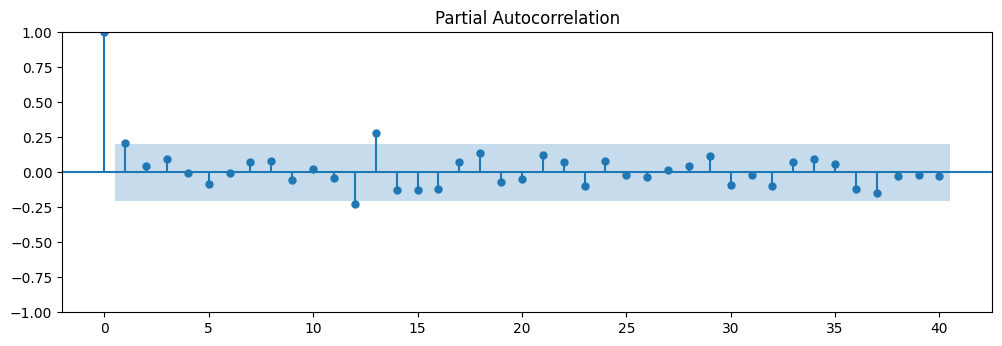

In [64]:
fig = plt.figure(figsize = (12,8))
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal first diff.'].iloc[13:], lags=40, ax=ax2)

In [70]:
model = ARIMA(df['Sales'], order=(1,1,1))

In [71]:
model = model.fit()

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 21 Mar 2025   AIC                           1911.627
Time:                        22:29:04   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.000      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.318      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
df.shape

(105, 3)

In [74]:
df['forecast'] = model.predict(start=90, end=103, dynamic=True)

In [75]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,4977.017026
1971-08-01,1659.0,-2974.0,-79.0,5023.838991
1971-09-01,5951.0,4292.0,730.0,5045.119905
1971-10-01,6981.0,1030.0,557.0,5054.792230


<Axes: xlabel='Month'>

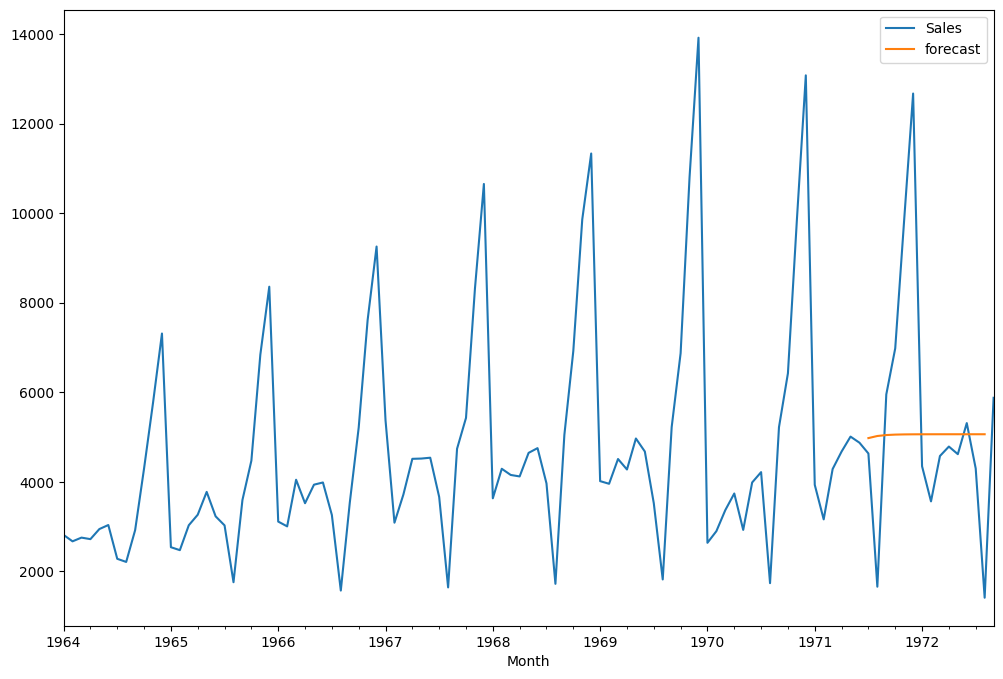

In [76]:
df[['Sales', 'forecast']].plot(figsize=(12,8))

## SARIMAX

In [77]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

In [78]:
results=model.fit()

In [79]:
df['forecast_SARIMAX'] = results.predict(start=90, end=103, dynamic=True)

In [80]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
Month,,,,,
1971-02-01,3162.0,-772.0,263.0,NaN,NaN
1971-03-01,4286.0,1124.0,916.0,NaN,NaN
1971-04-01,4676.0,390.0,936.0,NaN,NaN
1971-05-01,5010.0,334.0,2083.0,NaN,NaN
1971-06-01,4874.0,-136.0,888.0,NaN,NaN
1971-07-01,4633.0,-241.0,416.0,4977.017026,4437.325603
1971-08-01,1659.0,-2974.0,-79.0,5023.838991,2050.747875
1971-09-01,5951.0,4292.0,730.0,5045.119905,5493.376793
1971-10-01,6981.0,1030.0,557.0,5054.792230,6752.038657


<Axes: xlabel='Month'>

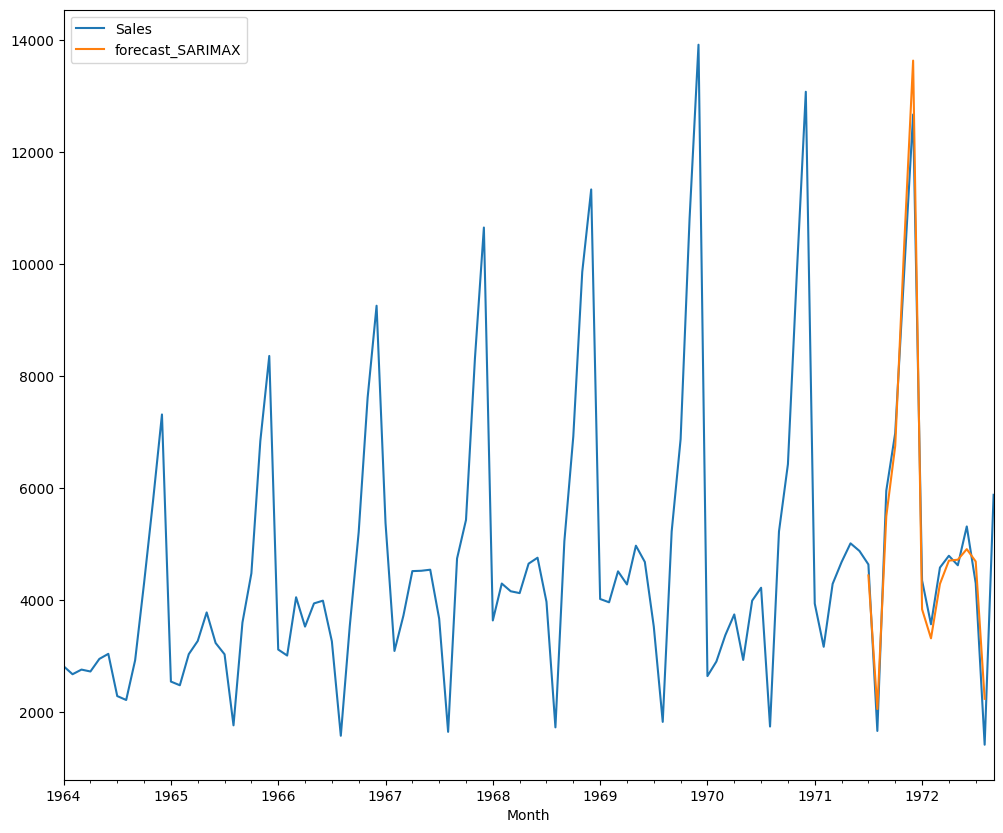

In [81]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,10))

In [82]:
future_dates = [df.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [83]:
future_dates[1:]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [84]:
future_dataset = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [85]:
future_dataset.tail()

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [86]:
future_df = pd.concat([df, future_dataset])

In [87]:
future_df.shape

(128, 5)

In [88]:
future_df['forecast_SARIMAX2'] = results.predict(start=104, end=124, dynamic=True)

<Axes: >

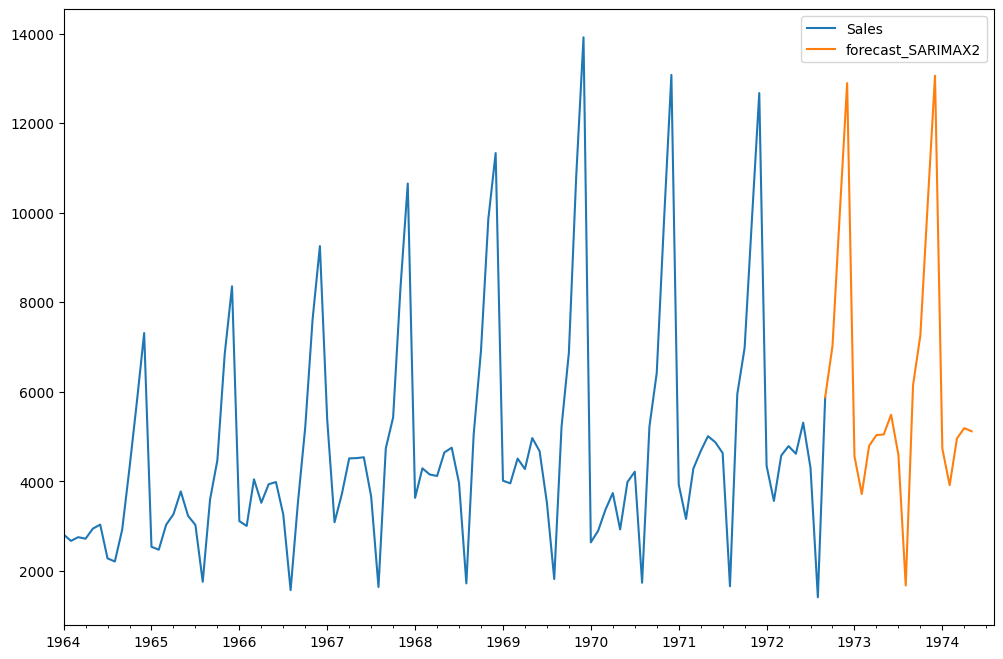

In [89]:
future_df[['Sales', 'forecast_SARIMAX2']].plot(figsize=(12,8))